## BERT
- 구글에서 개발한 NLP(자연어처리) 사전 훈련 기술이며, 특정 분야에 국한된 기술이 아니라 모든 자연어 처리 분야에서 좋은 성능을 내는 범용 Language Model
- '사전 훈련 언어모델'
- BERT등장 이전에는 데이터의 전처리 임베딩을 Word2Vec, GloVe, Fasttext 방식을 많이 사용했지만,요즘의 고성능을 내는 대부분의 모델에서 BERT를 많이 사용하고 있다고 함.
- 대량 코퍼스로 BERT 언어모델을 적용하고, BERT언어모델 출력에 추가적인 모델(RNN, CNN 등의 머신러닝 모델)을 쌓아 원하는 Task를 수행하는 것 입니다. 이 때, 추가적인 모델을 복잡한 CNN, LSTM, Attention을 쌓지 않고 간단한 DNN모델만 쌓아도 Task 성능이 잘 나온다고 알려져 있고, DNN을 이용하였을 때와 CNN등 과 같은 복잡한 모델을 이용하였을 때의 성능 차이가 거의 없다고 알려져 있음.



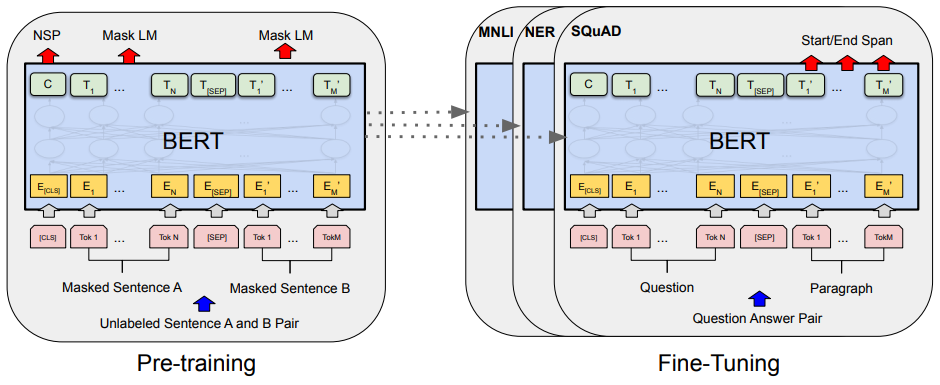

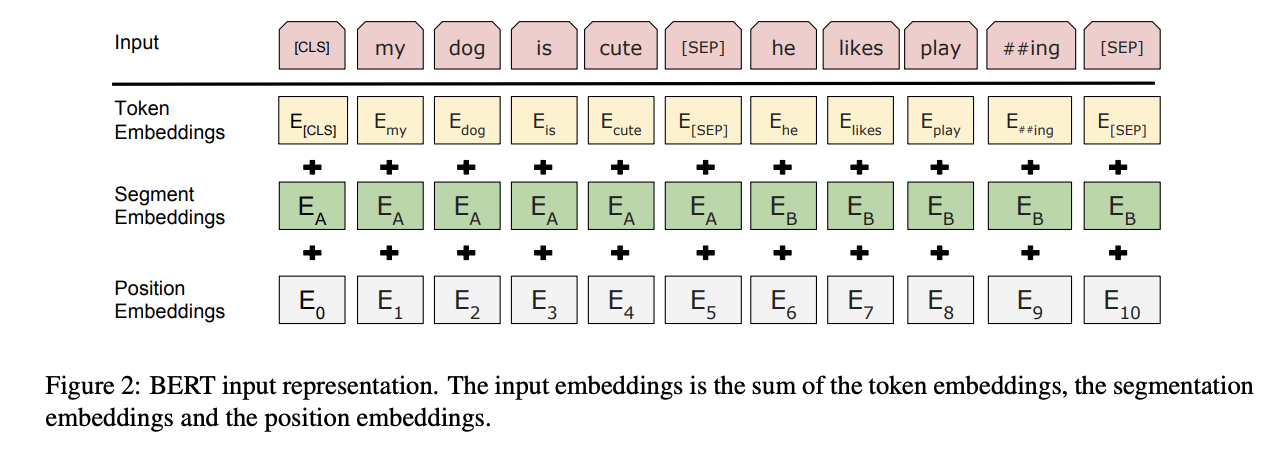

### BERT Input : Token Embedding + Segment Embedding + Position Embedding

- Token Embedding
##### Word Piece 임베딩 방식 사용, 각 Char(문자) 단위로 임베딩을 하고, 자주 등장하면서 가장 긴 길이의 sub-word를 하나의 단위로 만듭니다. 자주 등장하지 않는 단어는 다시 sub-word로 만듭니다. 이는 이전에 자주 등장하지 않았던 단어를 모조리 'OOV'처리하여 모델링의 성능을 저하했던 'OOV'문제도 해결 할 수 있습니다.

- Segment Embedding
##### Sentence Embedding, 토큰 시킨 단어들을 다시 하나의 문장으로 만드는 작업입니다. BERT에서는 두개의 문장을 구분자([SEP])를 넣어 구분하고 그 두 문장을 하나의 Segment로 지정하여 입력합니다. BERT에서는 이 한 세그먼트를 512 sub-word 길이로 제한하는데, 한국어는 보통 20 sub-word가 한 문장을 이룬다고 하며 대부분의 문장은 60 sub-word가 넘지 않는다고 하니 BERT를 사용할 때, 하나의 세그먼트에 128로 제한하여도 충분히 학습이 가능하다고 합니다.

- Position Embedding
##### 각 Token의 위치 정보를 표현하는 Vector

- BERT는 Contextual Embedding 방법에 속한다.

( Contextualised Word Embedding은 단어마다 벡터가 고정되어 있지 않고 문장마다 단어의 Vector가 달라지는 Embedding 방법을 뜻한다 대표적으로 ELMo, GPT, BERT가 있다. )

 Static Word Embedding 문제점

( Static Word Embedding은 단어마다 벡터가 고정되어 있는 방법을 뜻하면 대표적으로 Word2vec, Fasttext, Glove이 존재한다. )


- Problem : 단어의 Vector가 모든 문맥에서 동일하다.

에를 들어 "배를 타고 떠났다"와 "맛있는 배를 먹었다"라는 문장에서 "배를"은 같은 벡터 값을 가진다.


BERT의 저자는 이전에 Transformer 모델을 발표하였는데, Transformer란 CNN, RNN 과 같은 모델 대신 Self-Attention 이라는 모델을 사용하는 모델입니다. BERT는 Transformer의 인코더, 디코더 중 인코더만 사용합니다. 

Transformer(Self-Attention) 참고글

Self Attention은 입력의 위치를 고려하지 않고 입력 토큰의 위치 정보를 고려합니다. 그래서 Transformer모델에서는 Sinusoid(사인파) 함수를 이용하여 Positional encoding을 사용하고 BERT는 이를 따서 Position Encoding을 사용한다고 함.
간단하게 이해하면 Position encoding은 Token 순대로 인코딩 하는 것을 뜻합니다.

 

BERT는 위 세가지 임베딩을 합치고 이에 Layer정규화와 Dropout을 적용하여 입력으로 사용합니다.





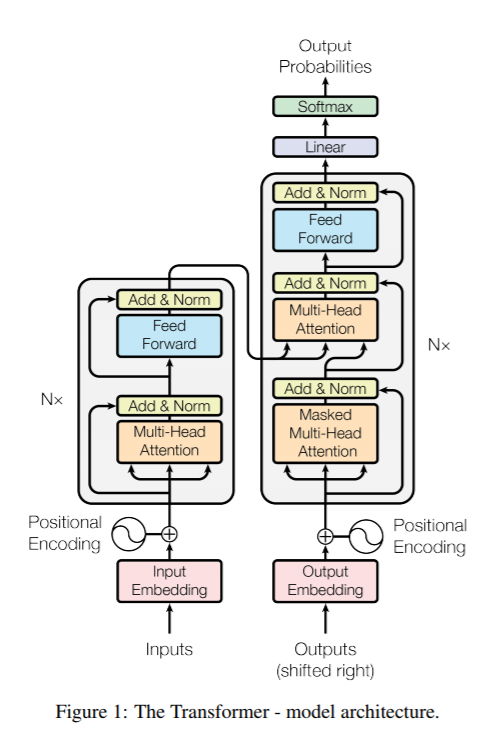
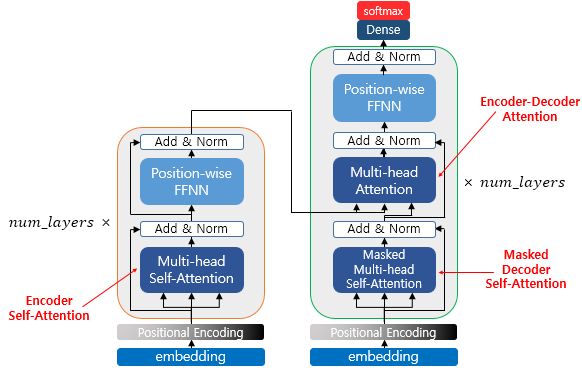

BERT 는 Transformer 라는 모델이 기반한다.
Transformer 모델은 input Text 를 입력받아, 기본적으로 Attention 메커니즘을 통해 인코딩, 디코딩하는 방식의 모델
Convolution도, Recurrence도 사용하지 않으며 LSTM+RNN 처럼 각 단위 워드 벡터가 시간의 연속성을 기억하고 있을 필요는 없어 성능이 훨씬 좋다

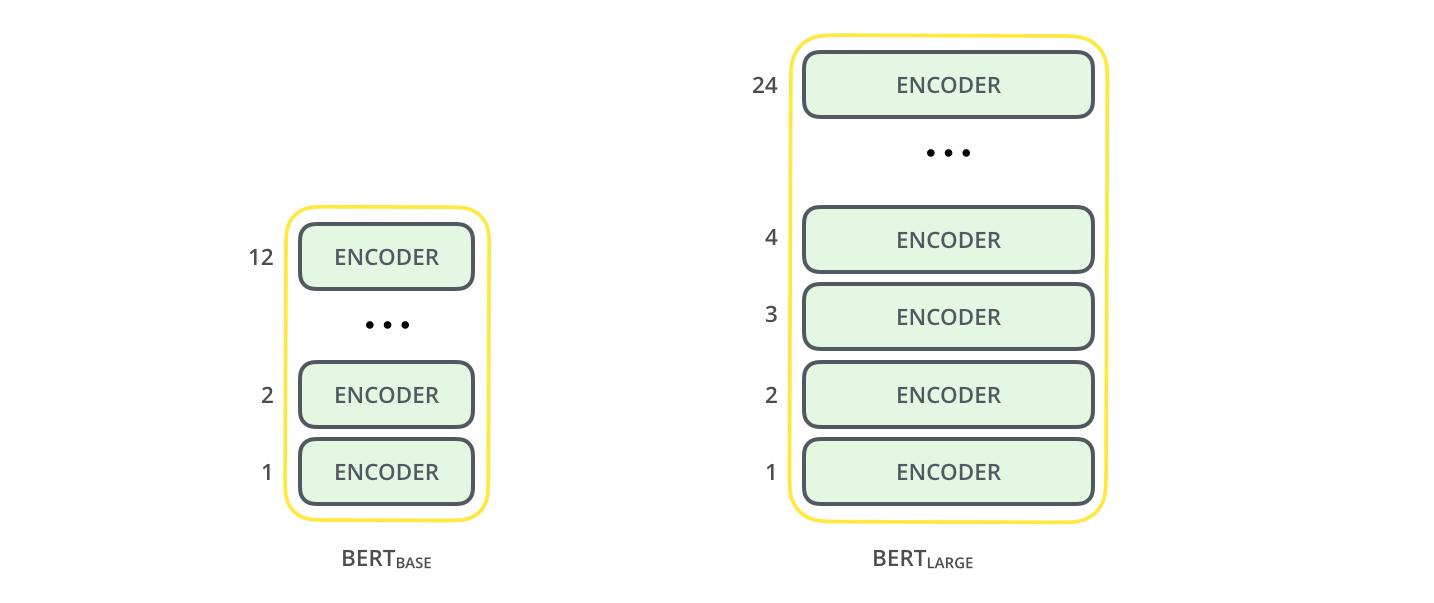

- BERT는 단순히 말하자면 학습된 Transformer Encoder를 쌓아 놓은 것

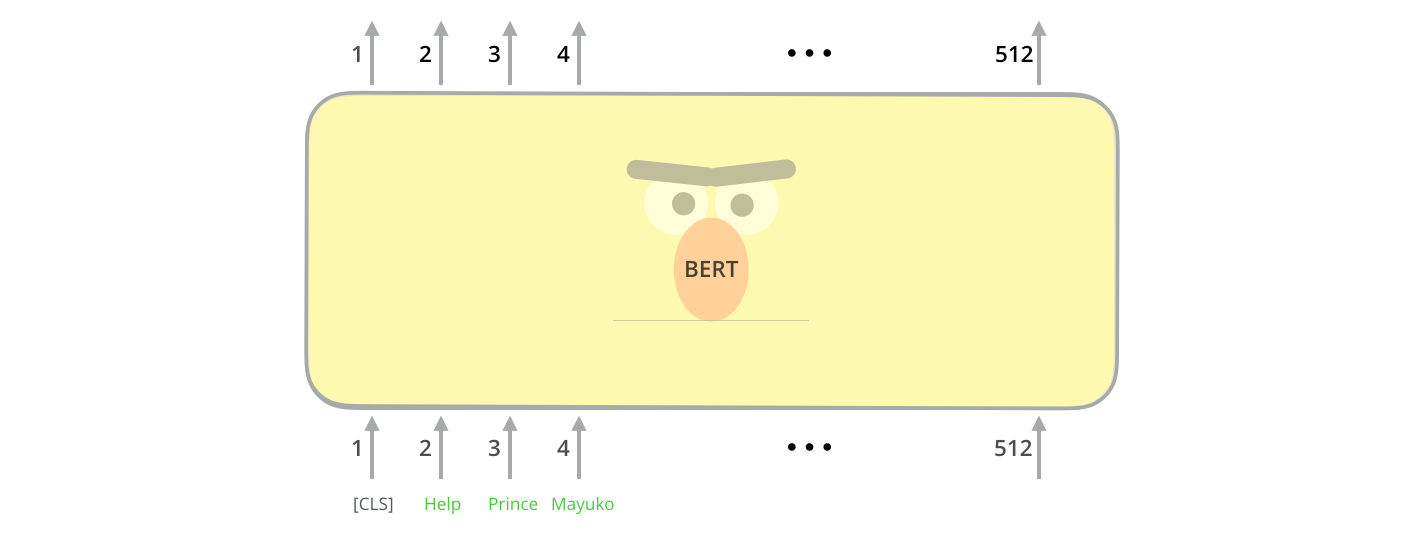
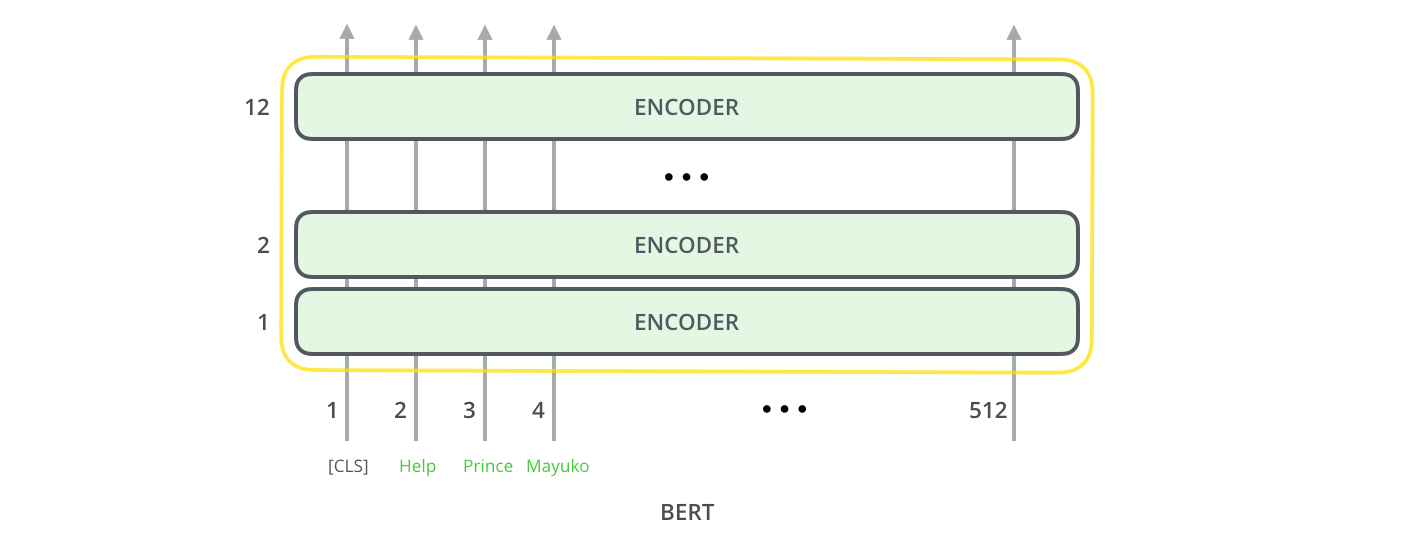

첫 번째 입력 토큰으로는 스페셜 토큰인 [CLS]가 들어가게 됩니다. 이렇게 하는 이유는 나중에 자연스럽게 알게될 것입니다. 여기서 CLS란 Classification을 나타냅니다.

transformer의 기본 encoder와 동일하게, BERT는 단어의 시퀀스를 입력으로 받아 encoder stack을 계속 타고 올라갑니다. 각 encoder layer는 self-attention을 적용하고 feed-forward network를 통과시킨 결과를 다음 encoder에게 전달합니다.


구조상 보았을 때, 현재 encoding 단계까지는 Transformer와 동일합니다 (언제든 조절할 수 있는 모델 안의 hidden unit수와 같은 size 제외). 이제 출력 단계로 넘어가면 어떻게 BERT와 Transformer가 다른지를 볼 수 있게 됩니다.

# Model Outputs
각 (단어) 위치에서는 hidden_size의 (BERT Base의 경우 768) 벡터를 출력합니다. 위에서 살펴본 문장 분류 (sentence classification) 예제의 경우, 우리는 첫 번째 위치에서의 출력 (output)에만 집중합니다. 이것은 바로 스페셜 토큰인 [CLS]의 결과이죠.


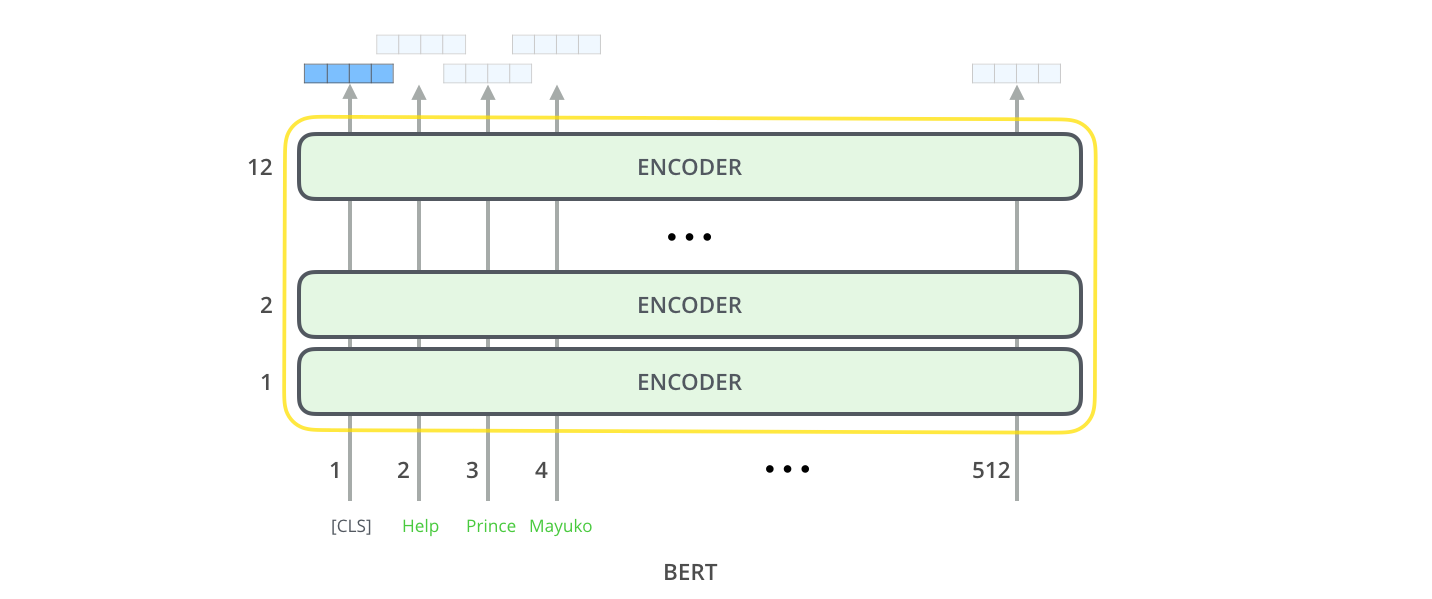

결과로 나온 출력 벡터는 이제 우리가 고른 classifier에 입력으로 이용될 수 있습니다. BERT의 논문에서는 매우 단순한 형태인 single-layer를 classifier로 이용했음에도 불구하고 매우 좋은 결과를 얻을수 있음.


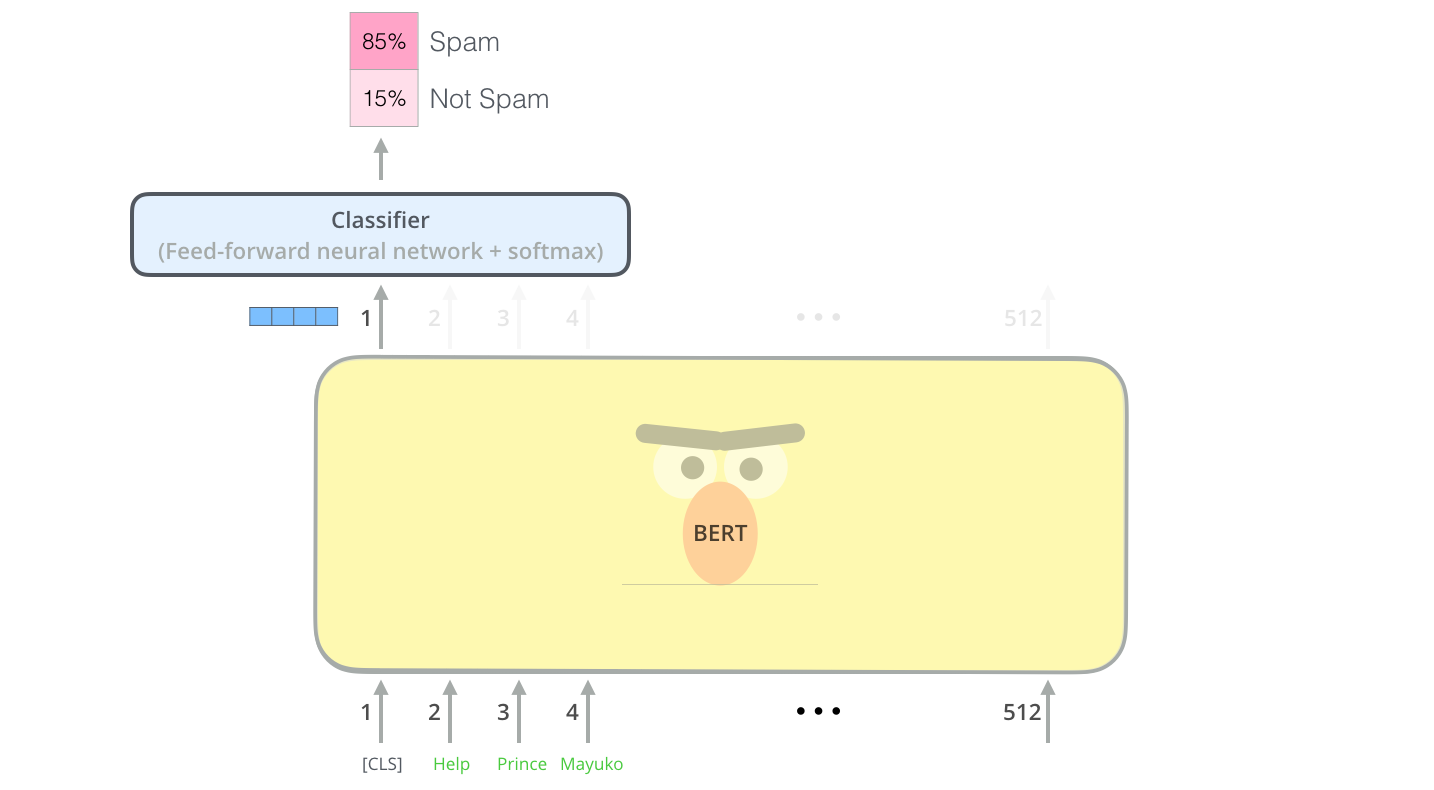

# BERT 예제 - 네이버 긍정부정 댓글 판단

In [128]:
import torch

from transformers import BertTokenizer
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import random
import time
import datetime

In [129]:
train = pd.read_table("C:\\Users\\negga\\Desktop\\nsmc-master\\ratings_train.txt")
test = pd.read_table("C:\\Users\\negga\\Desktop\\nsmc-master\\ratings_test.txt")

In [130]:
print(train.shape)
train

(150000, 3)


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [131]:
print(test.shape)
test

(50000, 3)


,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


BERT모델의 input 으로 dataset을 넣기 위해서는 3가지 전처리를 하여야함
- Token Embedding
- Segement Embedding
- Position Embedding

--------------------------------------------------------Segement Embedding--------------------------------------------------------------

In [132]:
bert_processing = ["[CLS] " + str(s) + " [SEP]" for s in train.document]

In [133]:
bert_processing[:5]

['[CLS] 아 더빙.. 진짜 짜증나네요 목소리 [SEP]',
 '[CLS] 흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나 [SEP]',
 '[CLS] 너무재밓었다그래서보는것을추천한다 [SEP]',
 '[CLS] 교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정 [SEP]',
 '[CLS] 사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다 [SEP]']

====================================================================================================

In [134]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case = False)

-----------------------------------------Token Embedding---------------------------------------------

In [135]:
tokenized_texts = [tokenizer.tokenize(s) for s in bert_processing]
input_ids = [tokenizer.convert_tokens_to_ids(tokens) for tokens in tokenized_texts]

In [126]:
print(tokenized_texts[0])
print('-------------------------------------------------------------------------------------------------------------------')
print(input_ids[0])

['[CLS]', '아', '더', '##빙', '.', '.', '진', '##짜', '짜', '##증', '##나', '##네', '##요', '목', '##소', '##리', '[SEP]']
-------------------------------------------------------------------------------------------------------------------
[101, 9519, 9074, 119005, 119, 119, 9708, 119235, 9715, 119230, 16439, 77884, 48549, 9284, 22333, 12692, 102]


==========================================================================================

In [127]:
max_len = 128
"""
input data의 사이즈 크기를 동일하게 맞춰주기위해 패드시퀀스를 진행
"""
input_ids = pad_sequences(input_ids, maxlen=max_len, dtype='long', truncating='post', padding='post')
input_ids[0]

array([   101,   9519,   9074, 119005,    119,    119,   9708, 119235,
         9715, 119230,  16439,  77884,  48549,   9284,  22333,  12692,
          102,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

------------------------------------------Position Embedding--------------------------------------------------------

In [51]:
attention_masks = []

for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)
    
print(attention_masks[0])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


=====================================================================================

In [52]:
train_inputs, validation_inputs, train_labels, validation_labels = \
train_test_split(input_ids, train['label'].values, random_state=42, test_size=0.1)

train_masks, validation_masks, _, _ = train_test_split(attention_masks, 
                                                       input_ids,
                                                       random_state=42, 
                                                       test_size=0.1)

In [64]:
print(train_inputs.shape, train_labels.shape)
print(validation_inputs.shape, validation_labels.shape)
print(len(train_masks),len(validation_masks))

(135000, 128) (135000,)
(15000, 128) (15000,)
135000 15000


In [65]:
train_inputs = torch.tensor(train_inputs)
train_labels = torch.tensor(train_labels)
train_masks = torch.tensor(train_masks)
validation_inputs = torch.tensor(validation_inputs)
validation_labels = torch.tensor(validation_labels)
validation_masks = torch.tensor(validation_masks)

In [66]:
BATCH_SIZE = 32

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=BATCH_SIZE)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=BATCH_SIZE)

In [68]:
sentences = test['document']
sentences = ["[CLS] " + str(sentence) + " [SEP]" for sentence in sentences]
labels = test['label'].values

tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
input_ids = pad_sequences(input_ids, maxlen=max_len, dtype="long", truncating="post", padding="post")

attention_masks = []
for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)

test_inputs = torch.tensor(input_ids)
test_labels = torch.tensor(labels)
test_masks = torch.tensor(attention_masks)

test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = RandomSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=BATCH_SIZE)

In [69]:
if torch.cuda.is_available():    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print('No GPU available, using the CPU instead.')

There are 1 GPU(s) available.
We will use the GPU: GeForce RTX 3060 Ti


In [70]:
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=2)
model.cuda()

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [71]:
# 옵티마이저 설정
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # 학습률
                  eps = 1e-8 # 0으로 나누는 것을 방지하기 위한 epsilon 값
                )

# 에폭수
epochs = 4

# 총 훈련 스텝
total_steps = len(train_dataloader) * epochs

# lr 조금씩 감소시키는 스케줄러
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

In [72]:
# 정확도 계산 함수
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

# 시간 표시 함수
def format_time(elapsed):
    # 반올림
    elapsed_rounded = int(round((elapsed)))
    # hh:mm:ss으로 형태 변경
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [73]:
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# 그래디언트 초기화
model.zero_grad()

# 에폭만큼 반복
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # 시작 시간 설정
    t0 = time.time()

    # 로스 초기화
    total_loss = 0

    # 훈련모드로 변경
    model.train()
        
    # 데이터로더에서 배치만큼 반복하여 가져옴
    for step, batch in enumerate(train_dataloader):
        # 경과 정보 표시
        if step % 500 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # 배치를 GPU에 넣음
        batch = tuple(t.to(device) for t in batch)
        
        # 배치에서 데이터 추출
        b_input_ids, b_input_mask, b_labels = batch

        # Forward 수행                
        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask, 
                        labels=b_labels)
        
        # 로스 구함
        loss = outputs[0]

        # 총 로스 계산
        total_loss += loss.item()

        # Backward 수행으로 그래디언트 계산
        loss.backward()

        # 그래디언트 클리핑
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # 그래디언트를 통해 가중치 파라미터 업데이트
        optimizer.step()

        # 스케줄러로 학습률 감소
        scheduler.step()

        # 그래디언트 초기화
        model.zero_grad()

    # 평균 로스 계산
    avg_train_loss = total_loss / len(train_dataloader)            

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================

    print("")
    print("Running Validation...")

    #시작 시간 설정
    t0 = time.time()

    # 평가모드로 변경
    model.eval()

    # 변수 초기화
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # 데이터로더에서 배치만큼 반복하여 가져옴
    for batch in validation_dataloader:
        # 배치를 GPU에 넣음
        batch = tuple(t.to(device) for t in batch)
        
        # 배치에서 데이터 추출
        b_input_ids, b_input_mask, b_labels = batch
        
        # 그래디언트 계산 안함
        with torch.no_grad():     
            # Forward 수행
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # 로스 구함
        logits = outputs[0]

        # CPU로 데이터 이동
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # 출력 로직과 라벨을 비교하여 정확도 계산
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1

    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 4 ========
Training...
  Batch   500  of  4,219.    Elapsed: 0:02:09.
  Batch 1,000  of  4,219.    Elapsed: 0:04:17.
  Batch 1,500  of  4,219.    Elapsed: 0:06:25.
  Batch 2,000  of  4,219.    Elapsed: 0:08:32.
  Batch 2,500  of  4,219.    Elapsed: 0:10:40.
  Batch 3,000  of  4,219.    Elapsed: 0:12:48.
  Batch 3,500  of  4,219.    Elapsed: 0:14:56.
  Batch 4,000  of  4,219.    Elapsed: 0:17:04.

  Average training loss: 0.38
  Training epcoh took: 0:18:00

Running Validation...
  Accuracy: 0.86
  Validation took: 0:00:34

======== Epoch 2 / 4 ========
Training...
  Batch   500  of  4,219.    Elapsed: 0:02:08.
  Batch 1,000  of  4,219.    Elapsed: 0:04:15.
  Batch 1,500  of  4,219.    Elapsed: 0:06:22.
  Batch 2,000  of  4,219.    Elapsed: 0:08:28.
  Batch 2,500  of  4,219.    Elapsed: 0:10:35.
  Batch 3,000  of  4,219.    Elapsed: 0:12:43.
  Batch 3,500  of  4,219.    Elapsed: 0:14:50.
  Batch 4,000  of  4,219.    Elapsed: 0:16:58.

  Average training loss: 0.29
  

In [74]:
#시작 시간 설정
t0 = time.time()

# 평가모드로 변경
model.eval()

# 변수 초기화
eval_loss, eval_accuracy = 0, 0
nb_eval_steps, nb_eval_examples = 0, 0

# 데이터로더에서 배치만큼 반복하여 가져옴
for step, batch in enumerate(test_dataloader):
    # 경과 정보 표시
    if step % 100 == 0 and not step == 0:
        elapsed = format_time(time.time() - t0)
        print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(test_dataloader), elapsed))

    # 배치를 GPU에 넣음
    batch = tuple(t.to(device) for t in batch)
    
    # 배치에서 데이터 추출
    b_input_ids, b_input_mask, b_labels = batch
    
    # 그래디언트 계산 안함
    with torch.no_grad():     
        # Forward 수행
        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask)
    
    # 로스 구함
    logits = outputs[0]

    # CPU로 데이터 이동
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    
    # 출력 로짓과 라벨을 비교하여 정확도 계산
    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1

print("")
print("Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
print("Test took: {:}".format(format_time(time.time() - t0)))

  Batch   100  of  1,563.    Elapsed: 0:00:07.
  Batch   200  of  1,563.    Elapsed: 0:00:15.
  Batch   300  of  1,563.    Elapsed: 0:00:22.
  Batch   400  of  1,563.    Elapsed: 0:00:29.
  Batch   500  of  1,563.    Elapsed: 0:00:36.
  Batch   600  of  1,563.    Elapsed: 0:00:43.
  Batch   700  of  1,563.    Elapsed: 0:00:51.
  Batch   800  of  1,563.    Elapsed: 0:00:58.
  Batch   900  of  1,563.    Elapsed: 0:01:05.
  Batch 1,000  of  1,563.    Elapsed: 0:01:13.
  Batch 1,100  of  1,563.    Elapsed: 0:01:20.
  Batch 1,200  of  1,563.    Elapsed: 0:01:28.
  Batch 1,300  of  1,563.    Elapsed: 0:01:35.
  Batch 1,400  of  1,563.    Elapsed: 0:01:43.
  Batch 1,500  of  1,563.    Elapsed: 0:01:50.

Accuracy: 0.87
Test took: 0:01:55


In [116]:
test_sentence = "너무 재미있네요"

test_sentence = ["[CLS] "+str(test_sentence)+ " [SEP]"]
test_tokenized = [tokenizer.tokenize(test_sentence[0])]
test_input_ids = [tokenizer.convert_tokens_to_ids(test_tokenized[0])]
test_input_ids = pad_sequences(test_input_ids, maxlen=max_len, dtype="long", truncating="post", padding="post")


print(test_sentence)
print(test_tokenized)
print(test_input_ids)

test_masks = []

for seq in test_input_ids:
    mask = [float(i>0) for i in seq]
    
    test_masks.append(mask)
    
print(test_masks)

test_labels = torch.tensor([0])
test_inputs = torch.tensor(test_input_ids)
test_masks = torch.tensor(test_masks)

test_inputs=test_inputs.to(device)
test_masks=test_masks.to(device)

model.eval()
out=model(test_inputs,test_masks)
logits = out[0]

        # CPU로 데이터 이동
logits = logits.detach().cpu().numpy()




print(np.argmax(logits, axis=1).flatten())

['[CLS] 너무 재미있네요 [SEP]']
[['[CLS]', '너', '##무', '재', '##미', '##있', '##네', '##요', '[SEP]']]
[[   101   9004  32537   9659  22458 119192  77884  48549    102      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0  

# http://yonghee.io/bert_binary_classification_naver/